In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')

<ipython-input-2-1db2887f109c>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


In [3]:
df=pd.read_csv('all-data.csv',encoding = "ISO-8859-1")
print(df.head())

    neutral  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

  According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  
0  Technopolis plans to develop in stages an area...                                                                               
1  The international electronic industry company ...                                                                               
2  With the new production plant the company woul...                                                                               
3  According to the company 's updated strategy f...                                                                               
4  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...                                                                               


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
df.isna().sum()

neutral                                                                                                                            0
According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .    0
dtype: int64

In [6]:
df.columns=['Sentiment','News Headline']

In [7]:
df.head()

,Sentiment,News Headline
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [8]:
df['Sentiment'].value_counts()

Sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

In [9]:
y=df['Sentiment'].values
y.shape

(4845,)

In [10]:
x=df['News Headline'].values
x.shape

(4845,)

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.3)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(1454,)

In [13]:
df1=pd.DataFrame(x_train)


In [15]:
df1=df1.rename(columns={0:'news'})

In [16]:
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

In [17]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

In [18]:
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""
  for i in text:
    if i not in string.punctuation:
      ans+=i
  return ans

In [22]:

df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [56]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [57]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

In [24]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [58]:
def librarygenerateGrams(text,n=1):
    tokens = word_tokenize(text.lower())
    n_grams = list(ngrams(tokens, n))
    return n_grams

In [25]:
generate_N_grams("The sun rises in the east",2)


Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

In [26]:
from collections import defaultdict


In [27]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

In [28]:
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

Sentence after removing stopwords: ['Finnish', 'high', 'technology', 'provider', 'Vaahto', 'Group', 'reports', 'net', 'sales', 'EUR', '418', 'mn', 'accounting', 'period', 'September', '2007', '', 'February', '2008', '', 'increase', '112', '', 'year', 'earlier', '']
Sentence after removing stopwords: ['The', 'company', 'booked', 'AprilJune', 'new', 'orders', 'worth', '949', 'mln', 'eur', '', 'compared', '786', 'mln', 'eur', 'period', 'year', 'ago', '']
Sentence after removing stopwords: ['Nyrstar', 'also', 'agreed', 'supply', 'Talvivaara', '150000', 'tonnes', 'sulphuric', 'acid', 'per', 'annum', 'use', 'Talvivaara', 'leaching', 'process', 'period', 'supply', 'zinc', 'concentrate', '']
Sentence after removing stopwords: ['Under', 'contract', 'Cramo', 'Sverige', 'subcontractor', 'Brinkab', 'AB', 'provide', 'scaffolding', 'installations', 'LKAB', 'new', 'pellets', 'plant', 'Kiruna', 'northern', 'Sweden', '']
Sentence after removing stopwords: ['Nevertheless', '', 'Fitch', 'notes', 'busines

In [29]:
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1



Sentence after removing stopwords: ['Finnish', 'glass', 'technology', 'company', 'Glaston', 'Oyj', 'Abp', 'net', 'profit', 'decreased', '26', 'mln', 'euro', '', '', '38', 'mln', '', 'first', 'nine', 'months', '2007', '78', 'mln', 'euro', '', '', '114', 'mln', '', 'period', '2006', '']
Sentence after removing stopwords: ['', 'ADP', 'News', '', '', 'Jan', '22', '', '2009', '', 'Finnish', 'mobile', 'phones', 'maker', 'Nokia', 'Oyj', '', 'OMX', '', 'NOK1V', '', 'said', 'today', 'operating', 'profit', 'decreased', 'EUR', '5', 'billion', '', 'USD', '65', 'bn', '', '2008', 'EUR', '8', 'billion', '2007', '']
Sentence after removing stopwords: ['It', 'awkward', 'thing', 'use', 'holding', 'phone', 'one', 'hand', '']
Sentence after removing stopwords: ['JP', 'Morgan', 'expects', 'Scala', 'lower', 'Nobel', 'Biocare', 'growth', 'forecast', '2007', 'current', 'guidance', '2325', 'pct', '', 'well', 'operating', 'margin', 'target', 'current', '3435', 'pct', '']
Sentence after removing stopwords: ['Net

In [30]:
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['The', 'share', 'share', 'capital', 'mentioned', 'shareholders', 'remains', '5', '', '']
Sentence after removing stopwords: ['NASDAQ', 'OMX', '', 'GEO1V', '', 'GyPSii', 'business', 'unit', '', 'developers', 'awardwinning', 'GyPSii', 'mobile', 'social', 'networking', 'application', '', 'today', 'announced', 'availability', 'free', 'download', 'via', 'Samsung', 'Mobile', 'Applications', 'Store', '']
Sentence after removing stopwords: ['EQT', 'completed', 'exit', 'Salcomp', '', 'Finnish', 'company', 'makes', 'mobile', 'phone', 'chargers', '', 'selling', 'remaining', 'stake', 'Swedish', 'investment', 'group', 'Nordstjernan', '', 'EURO', '', '35', 'million', '', '', '47', 'million', '', '']
Sentence after removing stopwords: ['Estonia', 'Agriculture', 'Minister', 'HelirValdor', 'Seeder', 'Finland', 'twoday', 'visit', '', 'course', 'meet', 'Finnish', 'counterpart', 'SirkkaLiisa', 'Anttila', '']
Sentence after removing stopwords: ['In', 'parallel', '', 'Tel

In [31]:
positiveValues

defaultdict(int,
            {'Finnish': 134,
             'high': 5,
             'technology': 28,
             'provider': 17,
             'Vaahto': 8,
             'Group': 37,
             'reports': 3,
             'net': 125,
             'sales': 120,
             'EUR': 277,
             '418': 1,
             'mn': 166,
             'accounting': 5,
             'period': 103,
             'September': 10,
             '2007': 53,
             '': 2666,
             'February': 12,
             '2008': 57,
             'increase': 48,
             '112': 1,
             'year': 101,
             'earlier': 25,
             'The': 208,
             'company': 162,
             'booked': 1,
             'AprilJune': 4,
             'new': 50,
             'orders': 18,
             'worth': 9,
             '949': 1,
             'mln': 85,
             'eur': 41,
             'compared': 49,
             '786': 1,
             'ago': 11,
             'Nyrstar': 2,
            

In [32]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [33]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

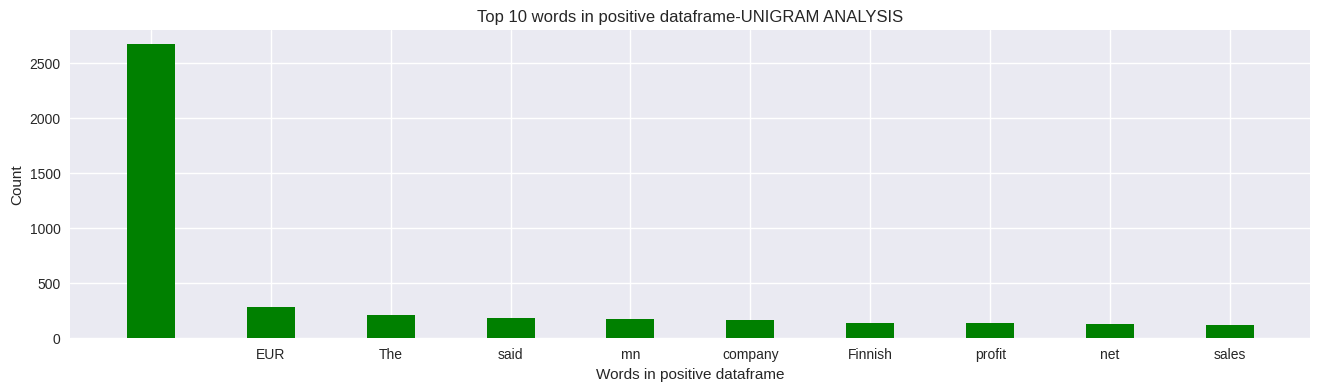

In [34]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

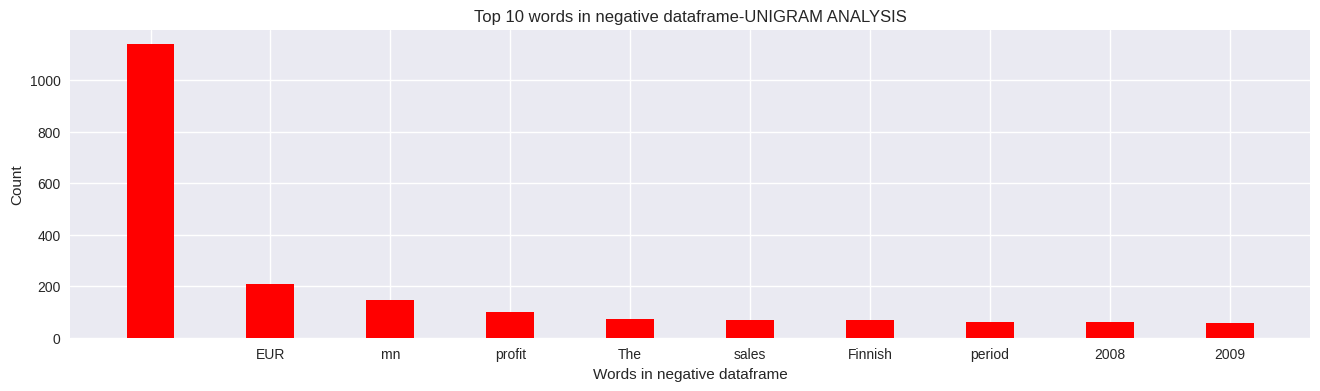

In [35]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

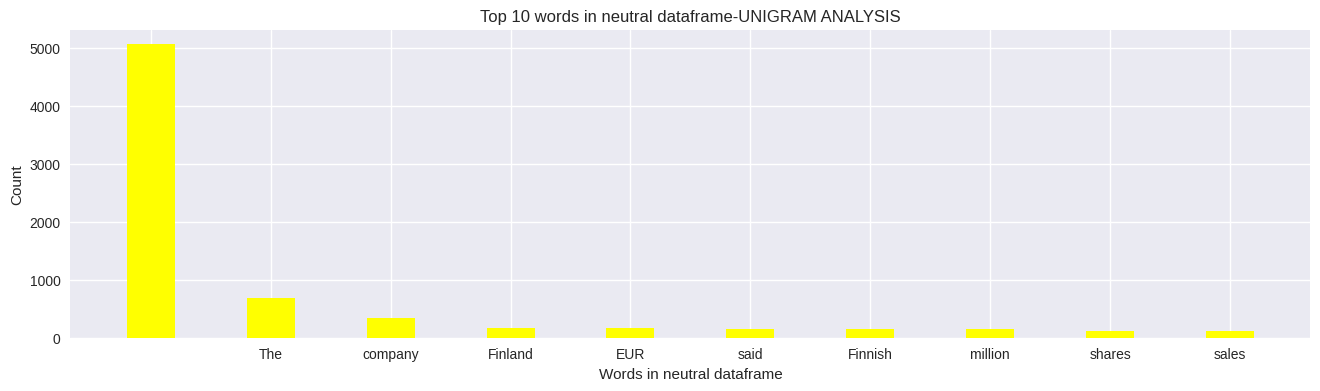

In [36]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

In [37]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['Finnish', 'high', 'technology', 'provider', 'Vaahto', 'Group', 'reports', 'net', 'sales', 'EUR', '418', 'mn', 'accounting', 'period', 'September', '2007', '', 'February', '2008', '', 'increase', '112', '', 'year', 'earlier', '']
Sentence after removing stopwords: ['The', 'company', 'booked', 'AprilJune', 'new', 'orders', 'worth', '949', 'mln', 'eur', '', 'compared', '786', 'mln', 'eur', 'period', 'year', 'ago', '']
Sentence after removing stopwords: ['Nyrstar', 'also', 'agreed', 'supply', 'Talvivaara', '150000', 'tonnes', 'sulphuric', 'acid', 'per', 'annum', 'use', 'Talvivaara', 'leaching', 'process', 'period', 'supply', 'zinc', 'concentrate', '']
Sentence after removing stopwords: ['Under', 'contract', 'Cramo', 'Sverige', 'subcontractor', 'Brinkab', 'AB', 'provide', 'scaffolding', 'installations', 'LKAB', 'new', 'pellets', 'plant', 'Kiruna', 'northern', 'Sweden', '']
Sentence after removing stopwords: ['Nevertheless', '', 'Fitch', 'notes', 'busines

In [38]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [39]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

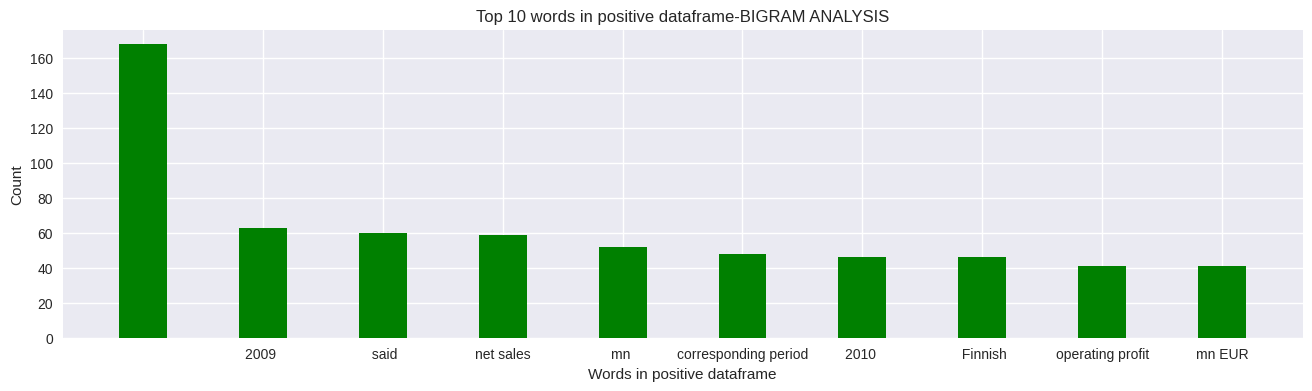

In [40]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

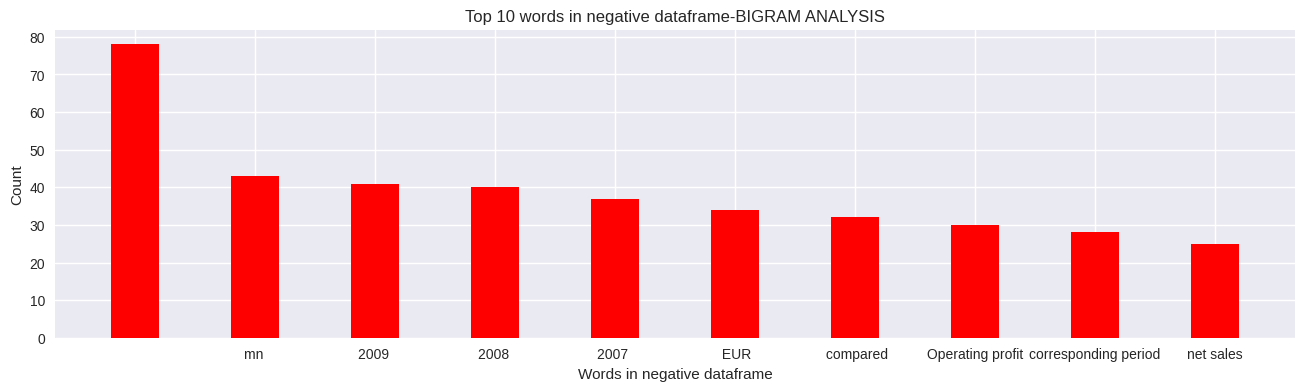

In [41]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

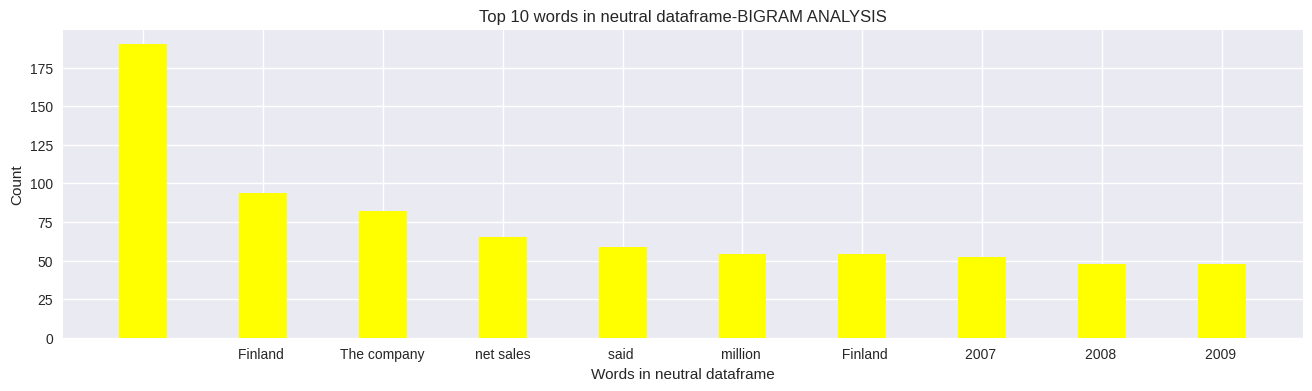

In [42]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

In [43]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)

for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

Sentence after removing stopwords: ['Finnish', 'high', 'technology', 'provider', 'Vaahto', 'Group', 'reports', 'net', 'sales', 'EUR', '418', 'mn', 'accounting', 'period', 'September', '2007', '', 'February', '2008', '', 'increase', '112', '', 'year', 'earlier', '']
Sentence after removing stopwords: ['The', 'company', 'booked', 'AprilJune', 'new', 'orders', 'worth', '949', 'mln', 'eur', '', 'compared', '786', 'mln', 'eur', 'period', 'year', 'ago', '']
Sentence after removing stopwords: ['Nyrstar', 'also', 'agreed', 'supply', 'Talvivaara', '150000', 'tonnes', 'sulphuric', 'acid', 'per', 'annum', 'use', 'Talvivaara', 'leaching', 'process', 'period', 'supply', 'zinc', 'concentrate', '']
Sentence after removing stopwords: ['Under', 'contract', 'Cramo', 'Sverige', 'subcontractor', 'Brinkab', 'AB', 'provide', 'scaffolding', 'installations', 'LKAB', 'new', 'pellets', 'plant', 'Kiruna', 'northern', 'Sweden', '']
Sentence after removing stopwords: ['Nevertheless', '', 'Fitch', 'notes', 'busines

In [44]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [45]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

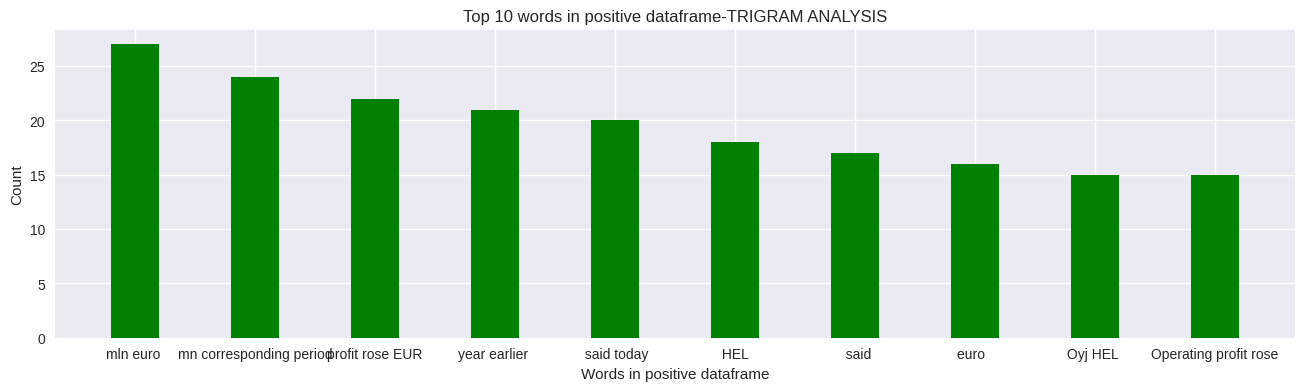

In [46]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

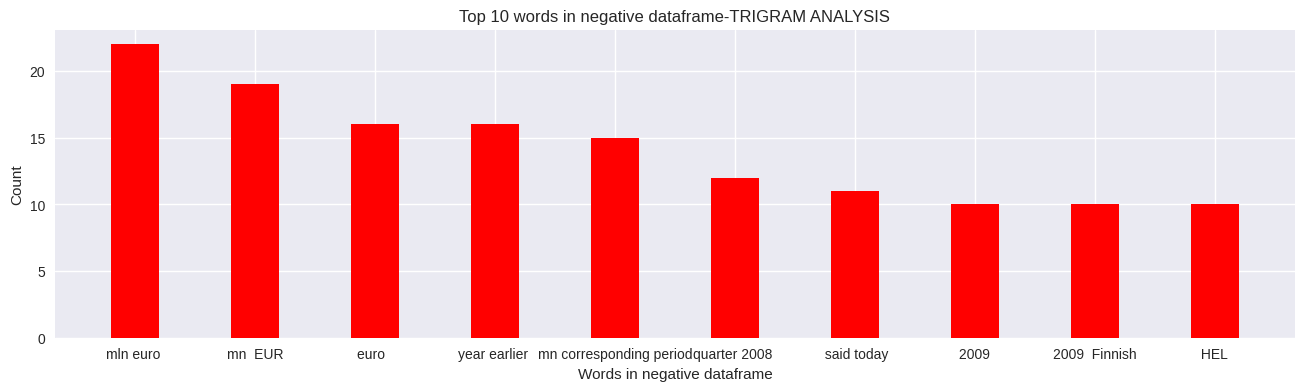

In [47]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

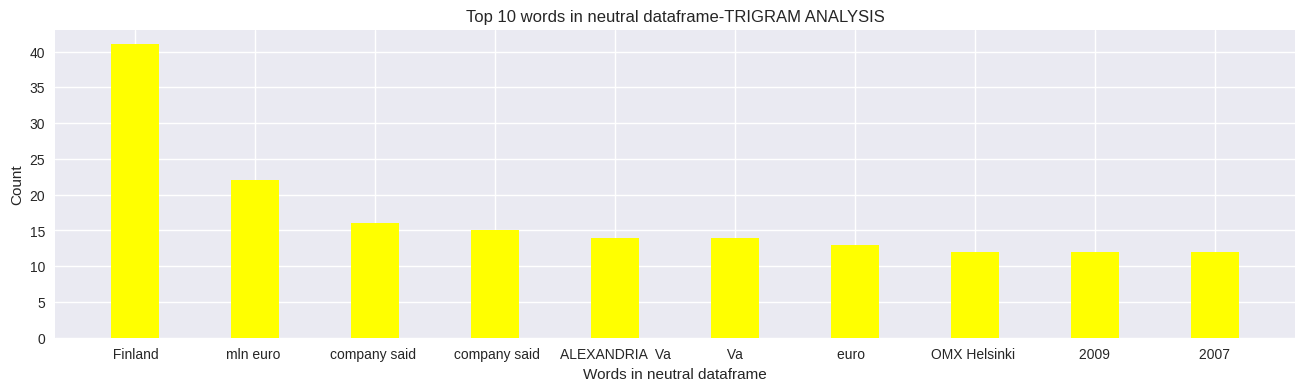

In [48]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

In [49]:
from collections import Counter

In [75]:
def generateProbabilities(text, n):
    nGrams = librarygenerateGrams(text, n)
    prev = librarygenerateGrams(text, n-1)

    nGram_counts = Counter(nGrams)
    prev_counts = Counter(prev)
    probabilities = {}
    for n_gram, count in nGram_counts.items():
      word, next_word = n_gram
      if word in probabilities:
          probabilities[word][next_word] = count / (nGram_counts[word]+1)
      else:
        probabilities[word]={next_word:count/(nGram_counts[word]+1)}
    return probabilities

In [73]:
def predict_next_word(input_text,n,words):
    probabilities=generateProbabilities(words, n)
    input_tokens = input_text.split()
    last_word = input_tokens[-1]
    if last_word in probabilities:
        next_word_probs = probabilities[last_word]
        predicted_word = max(next_word_probs, key=next_word_probs.get)
        return predicted_word
    else:
        return "No prediction available"

In [77]:


    next_word = predict_next_word("I am abdul", 2, "I am abdul rehman memon working in lab right now.")
    print(f"The word next is: {next_word}")



The word next is: rehman
